# FIT9145 - Introduction to Data Science : Assignment 1

StudentId: 29567467
Name: Roopak Thiyyathuparambil Jayachandran

## A1. Investing the Population Data

Importing pandas and matplotlib

In [571]:
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline


Creating dictionary for fonts which will be used throughout the Assignment for  labelling

In [572]:
axes = {'family': 'Georgia',
        'color':  'brown',
        'size': 16}

titlefont = {'family': 'Georgia',
        'color':  'black',
        'size': 18}

Importing the population dataset

In [573]:
population = pd.read_csv("Population.csv")

Inspecting the table. Indentifying the rows and columns

In [574]:
population.head(3)

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1,1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
2,1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


Understanding the year range for the data set

In [575]:
print("Year min",population.Year.min())
print("Year max",population.Year.max())

Year min 1800
Year max 2018


In [576]:
population.shape

(219, 196)

### Plotting population growth of Australia, China and United States over time

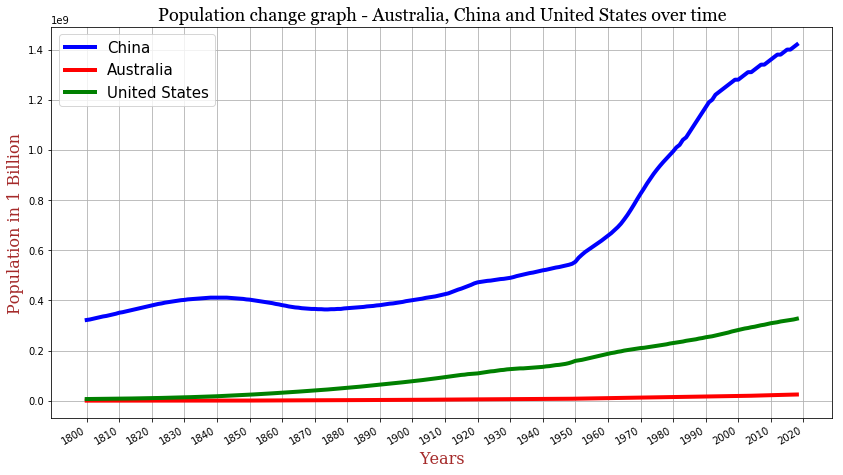

In [577]:
# Creating a list for x-ticks
number = 1800
xticks = []
while(number < 2030):
    xticks.append(number)
    number = number + 10

# Adjusting the figure size
fig = pt.figure(figsize=(14,8))

# Plotting for each country separately
pt.plot(population.Year, population.China, label='China',color='blue',linewidth=4 )
pt.plot(population.Year, population.Australia, label='Australia',color='red',linewidth=4)
pt.plot(population.Year, population['United States'], label='United States',color='green',linewidth=4)

# Labelling axes and titles with their corressponding fonts
pt.title("Population change graph - Australia, China and United States over time", fontdict=titlefont)
pt.xlabel('Years', fontdict=font)
pt.ylabel('Population in 1 Billion', fontdict=font)

# Adjusting legend position
pt.legend(loc=2, prop={'size': 15})

# Formatting the ticks
pt.xticks(xticks)
fig.autofmt_xdate()

# Enabling grid for better understanding 
pt.grid()

### Linear regression of Chinese Population and getting the linear fit

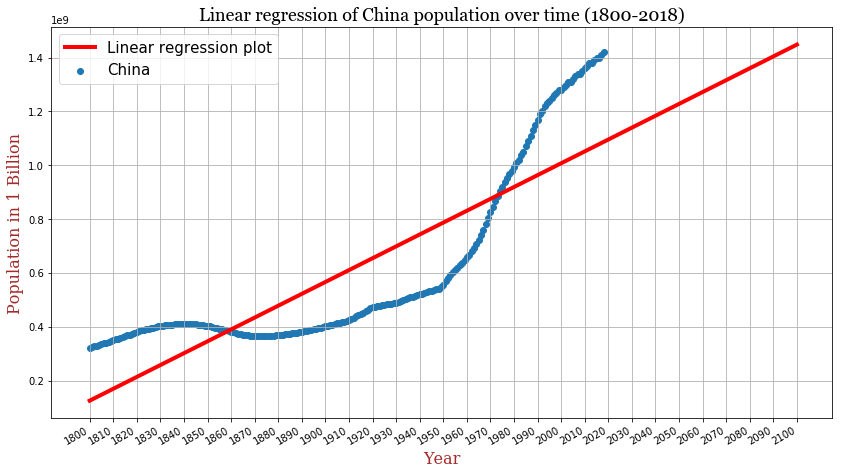

In [578]:
# importing lineregress from scipy.stats for linear regression
from scipy.stats import linregress

# ticks in x-axis
number = 1800
xticks = []
while(number < 2105):
    xticks.append(number)
    number = number + 10

# Extending the line to get the future value
year = population.Year.tolist()
year.append(2100)

# getting the slope for plotting the line
slope, intercept, r_value, p_value, std_err = linregress(population.Year,population.China)
line = [slope*xi + intercept for xi in pd.Series(year)]

# Figure size 14-8
fg = pt.figure(figsize=(14,8))

# Normal plot and scatter plot
pt.plot(pd.Series(year),line,'r-', linewidth=4, label = 'Linear regression plot')
pt.scatter(population['Year'], population['China'], label = 'China')
pt.legend(loc=2, prop={'size': 15})

# Labelling the axes and title
pt.xlabel('Year', fontdict=font)
pt.ylabel('Population in 1 Billion', fontdict=font)
pt.title("Linear regression of China population over time (1800-2018)", fontdict=titlefont)
pt.xticks(xticks)
fg.autofmt_xdate()

# Generating the grid
pt.grid()

### Getting the linear regression for latest data points(1960 onwards)

Creating the new table with latest data

In [579]:
print("Original table data point starting from",population.Year.min())
population_new = population[population['Year'] > 1959]
print("New table data point starting from", population_new.Year.min())

Original table data point starting from 1800
New table data point starting from 1960


In [580]:
year = population_new.Year.tolist()
year.append(2100)

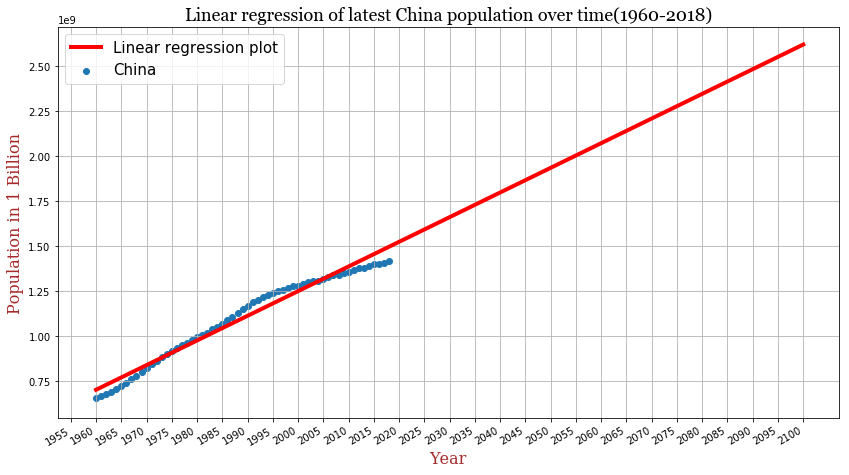

In [581]:
# ticks in x-axis
number = 1955
xticks = []
while(number < 2105):
    xticks.append(number)
    number = number + 5

# getting the slope for plotting the line
slope, intercept, r_value, p_value, std_err = linregress(population_new.Year,population_new.China)

line = [slope*xi + intercept for xi in pd.Series(year)]

# Setting the figure size
fg = pt.figure(figsize=(14,8))

# Normal plot and scatter plot
pt.plot(pd.Series(year),line,'r-', linewidth=4, label = 'Linear regression plot')
pt.scatter(population_new['Year'], population_new['China'], label = 'China')
pt.legend(loc=2, prop={'size': 15})

# Labelling the axes and title
pt.xlabel('Year', fontdict=font)
pt.ylabel('Population in 1 Billion', fontdict=font)
pt.title("Linear regression of latest China population over time(1960-2018)", fontdict=titlefont)
pt.xticks(xticks)
pt.grid()
fg.autofmt_xdate()

## A2. Investing the Gender Equality Data

Importing the data into DataFrame

In [582]:
gender_equality = pd.read_csv("GenderEquality.csv")
gender_equality.head(3)

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1970,15.4,87.4,90.0,97.0,51.3,103,96.7,91.7,95.2,...,90.6,96.8,100,87.8,75.9,92.9,79.9,11.2,58.2,69.6
1,1971,15.8,87.9,90.3,97.4,51.4,103,97.2,92.1,95.5,...,91.0,96.8,101,88.3,76.4,93.5,80.5,11.3,58.9,70.0
2,1972,15.4,88.3,90.2,97.8,51.9,104,97.5,92.5,95.7,...,91.4,97.0,101,88.8,76.9,93.8,81.1,11.4,59.4,70.5


Understanding the year range for the data set

In [583]:
gender_equality_aus = gender_equality[['Year','Australia']]

minimum_value = gender_equality_aus.Australia.min()
minimum_year = gender_equality_aus[gender_equality_aus.Australia == minimum_value].Year

print("Minimum Value")
print(minimum_value)
print("Year having the minimum value")
print(minimum_year)
print()

maximum_value = gender_equality_aus.Australia.max()
maximum_year = gender_equality_aus[gender_equality_aus.Australia == maximum_value].Year

print("Minimum Value and Year")
print(maximum_value)
print("Year having the maximum value")
print(maximum_year)
print()

Minimum Value
95.2
Year having the minimum value
0    1970
Name: Year, dtype: int64

Minimum Value and Year
103.0
Year having the maximum value
43    2013
44    2014
45    2015
Name: Year, dtype: int64



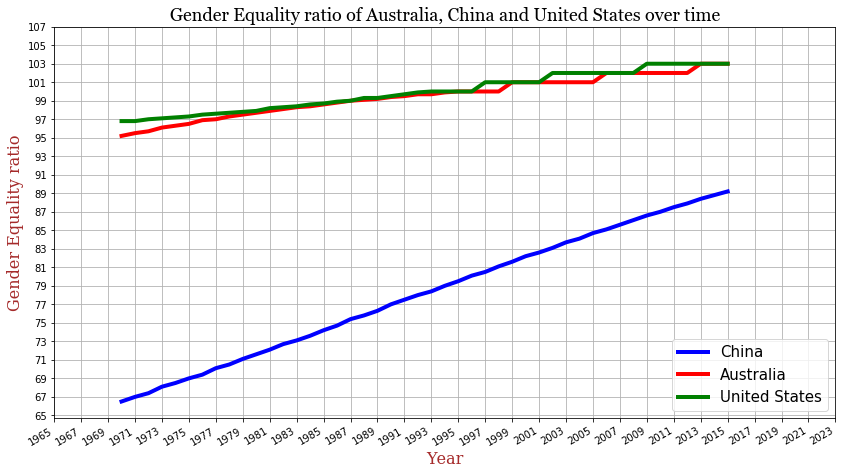

In [584]:
# generating x ticks
number = 1965
xticks = []
while(number < 2025):
    xticks.append(number)
    number = number + 2
    
# generating y ticks  
number = 65
yticks = []
while(number < 108):
    yticks.append(number)
    number = number + 2
    
fg = pt.figure(figsize=(14,8))

# Normal plots
pt.plot(gender_equality.Year, gender_equality.China, label='China',color='blue',linewidth=4 )
pt.plot(gender_equality.Year, gender_equality.Australia, label='Australia',color='red',linewidth=4)
pt.plot(gender_equality.Year, gender_equality['United States'], label='United States',color='green',linewidth=4)

# Labels and Titles
pt.xlabel('Year', fontdict=font)
pt.ylabel('Gender Equality ratio', fontdict=font)
pt.xticks(xticks)
pt.yticks(yticks
         )
pt.legend(loc=4, prop={'size': 15})
pt.title("Gender Equality ratio of Australia, China and United States over time", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()


Since the gender equality plot for Australia and United States are overlapping and creating confusion, we can plot them separately

### Gender equality plot for Australia in the given time range

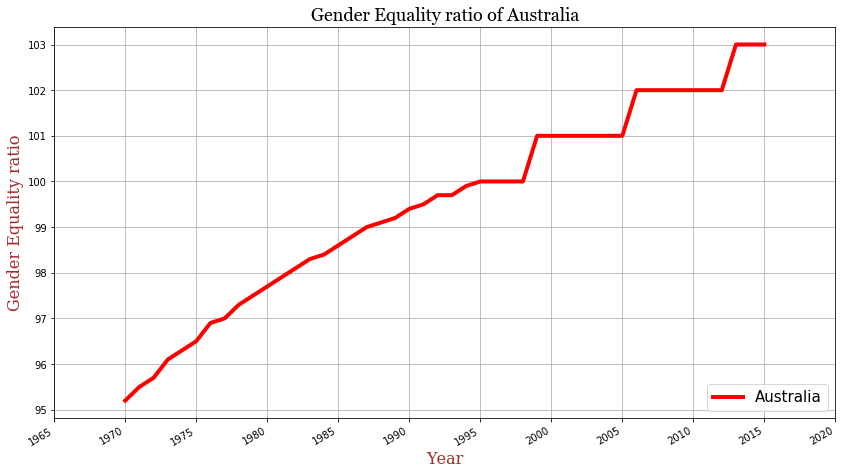

In [585]:
# generating x ticks
number = 1965
xticks = []
while(number < 2025):
    xticks.append(number)
    number = number + 5

# generating y ticks  
number = 95
yticks = []
while(number < 104):
    yticks.append(number)
    number = number + 1
    
    
fg = pt.figure(figsize=(14,8))

# Plot command
pt.plot(gender_equality.Year, gender_equality.Australia, label='Australia',color='red',linewidth=4)

pt.xlabel('Year', fontdict=font)
pt.ylabel('Gender Equality ratio', fontdict=font)
pt.xticks(xticks)
pt.yticks(yticks)

#Position of legend and font size
pt.legend(loc=4, prop={'size': 15})
pt.title("Gender Equality ratio of Australia", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

### Gender equality plot for United States in the given time range

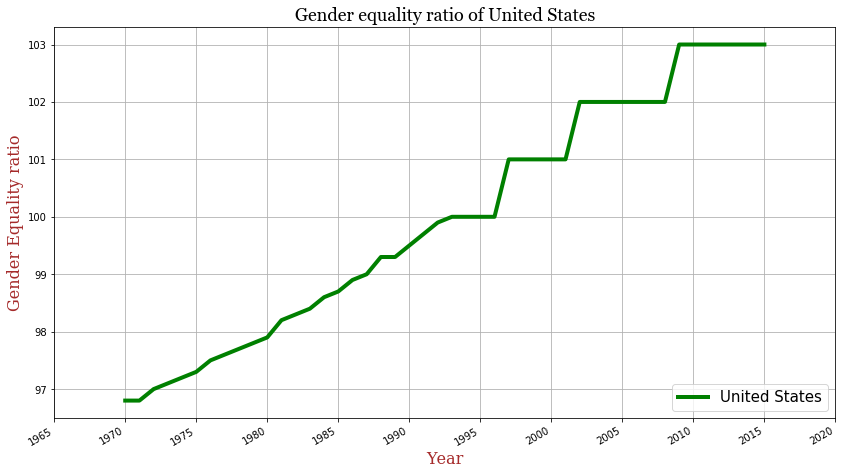

In [586]:
number = 1965
xticks = []
while(number < 2025):
    xticks.append(number)
    number = number + 5
    
fg = pt.figure(figsize=(14,8))
pt.plot(gender_equality.Year, gender_equality['United States'], label='United States',color='green',linewidth=4)
pt.xlabel('Year', fontdict=font)
pt.ylabel('Gender Equality ratio', fontdict=font)
pt.xticks(xticks)
pt.legend(loc=4, prop={'size': 15})
pt.title("Gender equality ratio of United States", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

### Linear regression of United States for gender equality and getting the linear fit

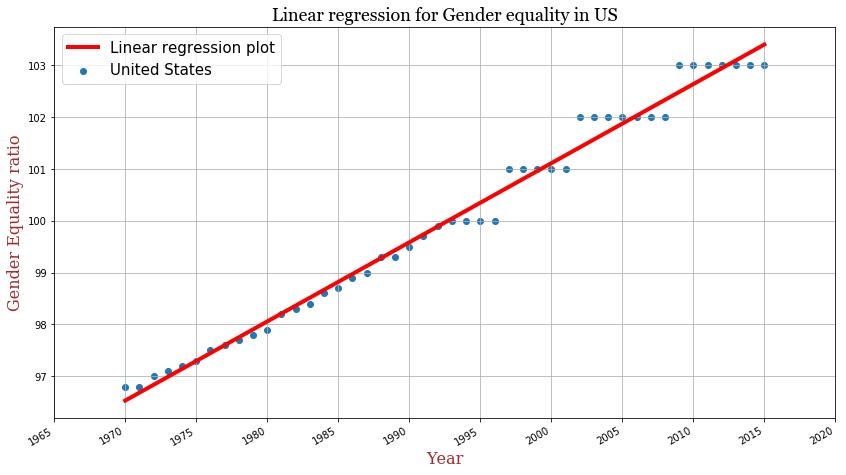

In [587]:
slope, intercept, r_value, p_value, std_err = linregress(gender_equality.Year,gender_equality['United States'])
line = [slope*xi + intercept for xi in gender_equality.Year]

number = 1965
xticks = []
while(number < 2025):
    xticks.append(number)
    number = number + 5
    
fg = pt.figure(figsize=(14,8))
pt.plot(gender_equality.Year,line,'r-', linewidth=4, label = 'Linear regression plot')
pt.scatter(gender_equality['Year'], gender_equality['United States'], label = 'United States')
pt.legend(loc=2, prop={'size': 15})
pt.xlabel('Year', fontdict=font)
pt.ylabel('Gender Equality ratio', fontdict=font)
pt.title("Linear regression for Gender equality in US", fontdict=titlefont)
pt.xticks(xticks)
pt.grid()
fg.autofmt_xdate()

## A3. Investigating the Income Data

Importing the income data to the DataFrame

In [588]:
income = pd.read_csv("Income.csv")
income.head(3)

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871


In [589]:
print("Year min",income.Year.min())
print("Year max",income.Year.max())

Year min 1800
Year max 2018


In [590]:
income.shape

(219, 194)

### Plotting Income of Australia, China and United States over time

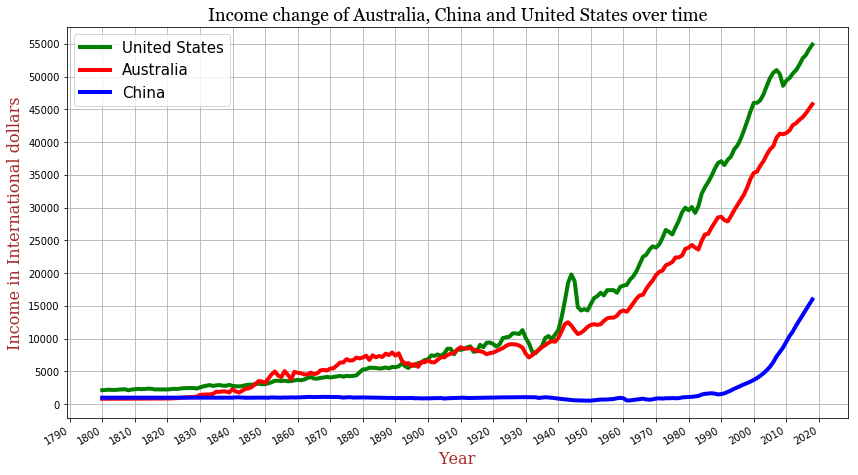

In [591]:
x_number = 1790
xticks = []
while(x_number < 2030):
    xticks.append(x_number)
    x_number = x_number + 10
    
y_number = 0
yticks = []
while(y_number < 60000):
    yticks.append(y_number)
    y_number = y_number + 5000
    
fg = pt.figure(figsize=(14,8))
pt.plot(income.Year, income['United States'], label='United States',color='green',linewidth=4)
pt.plot(income.Year, income.Australia, label='Australia',color='red',linewidth=4)
pt.plot(income.Year, income.China, label='China',color='blue',linewidth=4)
pt.xlabel('Year', fontdict=font)
pt.ylabel('Income in International dollars', fontdict=font)
pt.xticks(xticks)
pt.yticks(yticks)
pt.legend(loc=2, prop={'size': 15})
pt.title("Income change of Australia, China and United States over time", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

### Minimum income in China :

In [592]:
income.China.min()

530

In [593]:
income[income.China == income.China.min()].Year

149    1949
Name: Year, dtype: int64

Minimum income of 530 was recorded in China in the Year 1949

In [594]:
income[income.Year == int(income[income.China == income.China.min()].Year)].Australia

149    11800
Name: Australia, dtype: int64

In 1949, income of Australia was 11800

## A4. Visualising the Relationship between Gender Equality and Population

To get relationship between gender_equality, income and population, we have to combine 3 tables. But before that each of the table has to be restructered using melt function in pandas
For all the tables, retaining the Year column and melting rest all columns.

In [595]:
population_melt = pd.melt(population, id_vars=['Year'], value_vars = population[population.columns.difference(['Year'])], var_name = 'Country')
population_melt.rename(columns = {'value':'Population'}, inplace = True)

In [596]:
population_melt.head(3)

,Year,Country,Population
0,1800,Afghanistan,3280000
1,1801,Afghanistan,3280000
2,1802,Afghanistan,3280000


In [597]:
income_melt = pd.melt(income, id_vars=['Year'], value_vars = income[income.columns.difference(['Year'])], var_name = 'Country')
income_melt.rename(columns = {'value':'Income'}, inplace = True)

In [598]:
income_melt.head(3)

,Year,Country,Income
0,1800,Afghanistan,603
1,1801,Afghanistan,603
2,1802,Afghanistan,603


In [599]:
gender_equality_melt = pd.melt(gender_equality, id_vars=['Year'], value_vars = gender_equality[gender_equality.columns.difference(['Year'])], var_name = 'Country')
gender_equality_melt.rename(columns = {'value':'Gender_Equality'}, inplace = True)

In [600]:
gender_equality_melt.head(3)

,Year,Country,Gender_Equality
0,1970,Afghanistan,15.4
1,1971,Afghanistan,15.8
2,1972,Afghanistan,15.4


In [601]:
population_income_table = pd.merge(population_melt, income_melt, on = ["Year","Country"], how = "inner")

In [602]:
population_income_table.head(5)

,Year,Country,Population,Income
0,1800,Afghanistan,3280000,603
1,1801,Afghanistan,3280000,603
2,1802,Afghanistan,3280000,603
3,1803,Afghanistan,3280000,603
4,1804,Afghanistan,3280000,603


In [603]:
combined_table = pd.merge(population_income_table, gender_equality_melt, on = ["Year", "Country"], how = "inner")

In [604]:
combined_table.head(5)

,Year,Country,Population,Income,Gender_Equality
0,1970,Afghanistan,11100000,1180,15.4
1,1971,Afghanistan,11400000,1100,15.8
2,1972,Afghanistan,11700000,1050,15.4
3,1973,Afghanistan,12000000,1150,15.6
4,1974,Afghanistan,12300000,1180,15.9


First year after combination of all the 3 tables:

In [605]:
combined_table.Year.min()

1970

Last year after combination of all the 3 tables:

In [606]:
combined_table.Year.max()

2015

In [607]:
combined_table_grouped = combined_table.groupby('Country')

Relationship between gender ratio in schools and the population

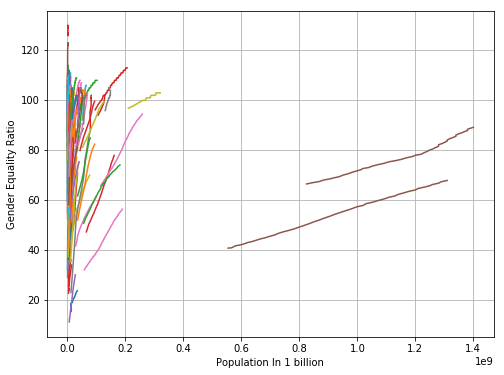

In [608]:
fig, ax = pt.subplots(figsize=(8,6))
plot2 = combined_table_grouped.plot('Population','Gender_Equality', by = 'Country', ax=ax, label = "Gender Ratio", legend=False)
ax.set_ylabel('Gender Equality Ratio')
ax.set_xlabel('Population In 1 billion')
ax.grid()

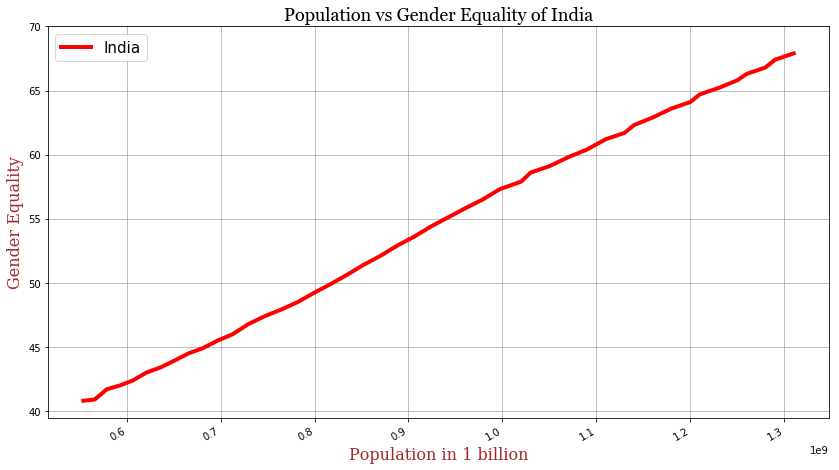

In [609]:
india_population = combined_table[combined_table['Country'] == "India"]
   
y_number = 40
yticks = []
while(y_number < 75):
    yticks.append(y_number)
    y_number = y_number + 5
    
fg = pt.figure(figsize=(14,8))
pt.plot(india_population.Population, india_population.Gender_Equality,color='red',linewidth=4, label = 'India')
pt.xlabel('Population in 1 billion', fontdict=font)
pt.ylabel('Gender Equality', fontdict=font)
#pt.xticks(xticks)
pt.yticks(yticks)
pt.legend(loc=2, prop={'size': 15})
pt.title("Population vs Gender Equality of India", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

In [610]:
from motionchart.motionchart import MotionChart

In [611]:
# now generate the motionchart and show it in the notebook
motionChart = MotionChart(df = combined_table, key='Year', x='Gender_Equality', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Country', category='Country')
motionChart.to_notebook()

Findings after running the visualisation from start to finish:
- Two countries with lowest gender ration: Afghanisthan (23.7) and Yemen (30.1)
- Country with the highest gender ratio : Lesotho (126)
- Though the increase is gradual, sex ratio is increasing during the whole period of time (More explained in the documentation)

In [612]:
bolivia = combined_table[combined_table['Country']=="Bolivia"]
capeVerde = combined_table[combined_table['Country']=="Cape Verde"]
bol_cap_table = bolivia.append(capeVerde)
# now generate the motionchart and show it in the notebook
mChart = MotionChart(df = bol_cap_table, key='Year', x='Gender_Equality', y='Income', xscale='linear', yscale='linear',
                     size='Population', color='Country', category='Country')
mChart.to_notebook()

Income of Cape Verde is greater than Bolivia from 2006 to 2013
Gender ratio of Caper verde was never greater than Bolivia

In [613]:
merge_table = pd.merge(bolivia, capeVerde, how='inner', on ='Year')

In [614]:
merge_table.head(2)

,Year,Country_x,Population_x,Income_x,Gender_Equality_x,Country_y,Population_y,Income_y,Gender_Equality_y
0,1970,Bolivia,4510000,3660,67.7,Cape Verde,270000,959,66.7
1,1971,Bolivia,4600000,3700,68.2,Cape Verde,273000,872,67.2


In [615]:
new = merge_table[merge_table.Income_x < merge_table.Income_y]

In [616]:
new

,Year,Country_x,Population_x,Income_x,Gender_Equality_x,Country_y,Population_y,Income_y,Gender_Equality_y
36,2006,Bolivia,9280000,4840,87.6,Cape Verde,481000,4950,84.3
37,2007,Bolivia,9440000,4970,88.0,Cape Verde,486000,5630,84.6
38,2008,Bolivia,9600000,5190,88.5,Cape Verde,492000,5940,85.1
39,2009,Bolivia,9760000,5280,89.0,Cape Verde,497000,5810,85.5
40,2010,Bolivia,9920000,5410,89.4,Cape Verde,502000,5830,86.0
41,2011,Bolivia,10100000,5600,89.8,Cape Verde,508000,5990,86.5
42,2012,Bolivia,10200000,5790,90.3,Cape Verde,514000,5990,86.9


In [617]:
new = merge_table[merge_table.Gender_Equality_x < merge_table.Gender_Equality_y]

In [618]:
new

,Year,Country_x,Population_x,Income_x,Gender_Equality_x,Country_y,Population_y,Income_y,Gender_Equality_y


A5. Identifying relation between income and gender ratio

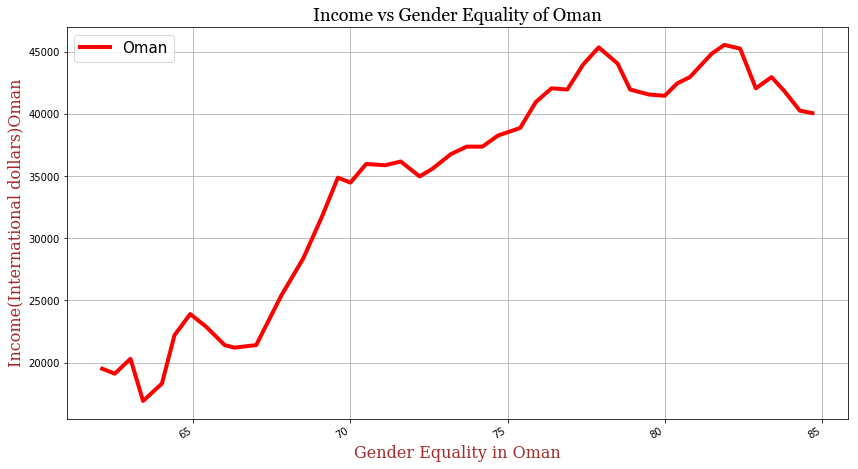

In [619]:
oman = combined_table[combined_table['Country']=="Oman"]

fg = pt.figure(figsize=(14,8))
pt.plot(oman.Gender_Equality, oman.Income,color='red',linewidth=4, label = 'Oman')
pt.xlabel('Gender Equality in Oman', fontdict=font)
pt.ylabel('Income(International dollars)Oman', fontdict=font)
pt.legend(loc=2, prop={'size': 15})
pt.title("Income vs Gender Equality of Oman", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

A5. Checking relatin between population and gender equality

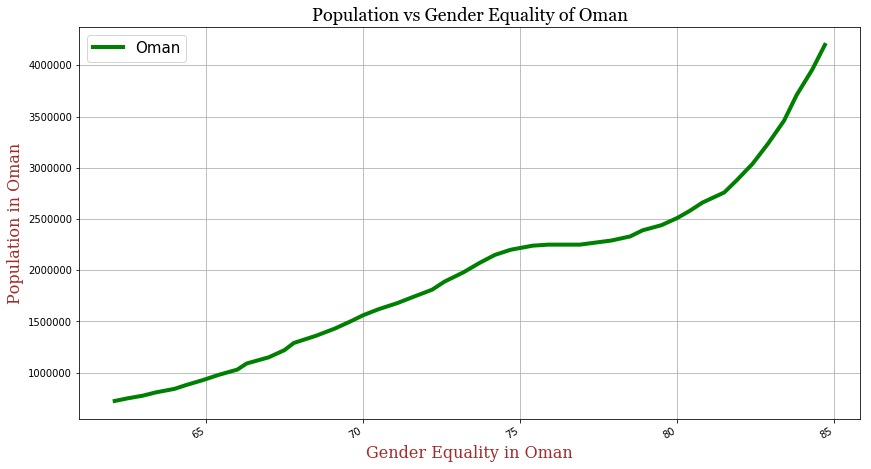

In [620]:
oman = combined_table[combined_table['Country']=="Oman"]

fg = pt.figure(figsize=(14,8))
pt.plot(oman.Gender_Equality, oman.Population,color='green',linewidth=4, label = 'Oman')
pt.xlabel('Gender Equality in Oman', fontdict=font)
pt.ylabel('Population in Oman', fontdict=font)
pt.legend(loc=2, prop={'size': 15})
pt.title("Population vs Gender Equality of Oman", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

In [621]:
from motionchart.motionchart import MotionChart
# now generate the motionchart and show it in the notebook
motionChart = MotionChart(df = combined_table, key='Year', x='Population', y='Income', xscale='linear', yscale='linear',
                     size='Gender_Equality', color='Country', category='Country')
motionChart.to_notebook()

## Task B: Exploratory Analysis on Big Data

### Exploratory analysis on the health insurance marketplace data.

Importing the insurance dataset

In [622]:
insurance_rate = pd.read_csv("InsuranceRates.csv")

In [623]:
insurance_rate.head(5)

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


### B1.1. Rows and columns in the insurance_rate table

In [624]:
insurance_rate.shape

(12694445, 7)

There are 12694445 rows and 7 columns in insurance_rate table

### B1.2 Years covered in the data

In [625]:
insurance_rate.BusinessYear.unique()

array([2014, 2015, 2016])

The dataset covers insurance rates for 3 years - 2014, 2015 and 2016

In [626]:
insurance_rate.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

### B1.3 Possible values for Age column are listed above

In [627]:
len(insurance_rate.StateCode.unique())

39

### B1.4 Since each of the state code represents a separate state, so there are 39 states present in the dataset

In [628]:
len(insurance_rate.IssuerId.unique())

910

### B1.5 Insurance providers are represented using Issuer Id. So the count of unique values of the IssuerId column will give the number of insurance providers

Average, maximum and minimum values for the monthly insurance premium cost for an individual

In [629]:
insurance_rate.IndividualRate.min()

0.0

In [630]:
insurance_rate.IndividualRate.max()

999999.0

In [631]:
insurance_rate.IndividualRate.mean()

4098.026458581588

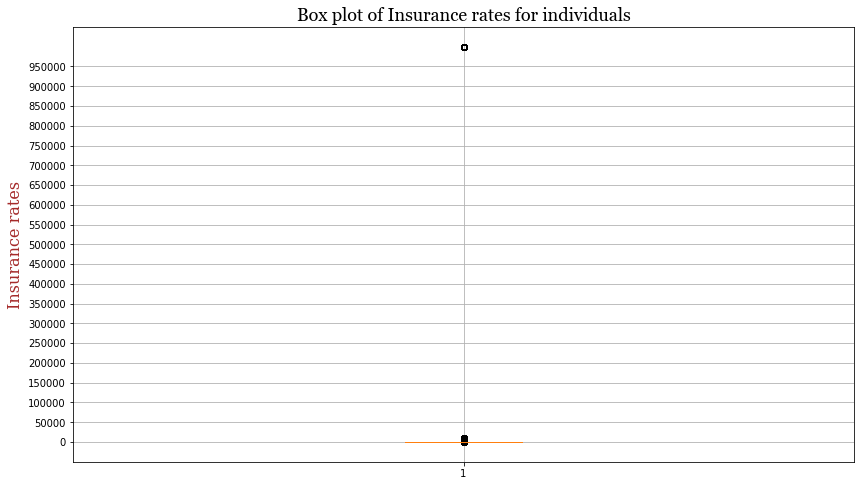

In [632]:
y_number = 0
yticks = []
while(y_number < 1000000):
    yticks.append(y_number)
    y_number = y_number + 50000
    
fg = pt.figure(figsize=(14,8))
pt.boxplot(insurance_rate.IndividualRate)
pt.ylabel('Insurance rates', fontdict=font)
pt.yticks(yticks)
pt.title("Box plot of Insurance rates for individuals", fontdict=titlefont)
pt.grid()

In [633]:
insurance_rate[insurance_rate.IndividualRate == 999999.0].IndividualRate.count()

47790

The maximum value of 999999 is too high and not reasonable. From the above analysis, it is clear that 47790 data records are having Individual rate as 999999, which is an outlier and it also impacts the mean value of overall individual rate.

## B2. Investigating Individual Insurance Costs

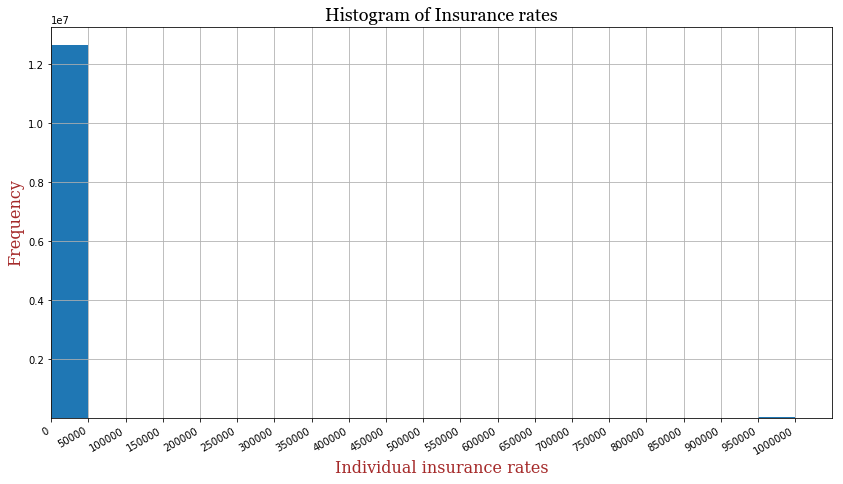

In [634]:
x_number = 0
xticks = []
while(x_number < 1050000):
    xticks.append(x_number)
    x_number = x_number + 50000
    
y_number = 2000000
yticks = []
while(y_number < 14000000):
    yticks.append(y_number)
    y_number = y_number + 2000000
    
fg = pt.figure(figsize=(14,8))
pt.hist(insurance_rate.IndividualRate, bins=20)
pt.xlabel('Individual insurance rates', fontdict=font)
pt.ylabel('Frequency', fontdict=font)
pt.xticks(xticks)
pt.yticks(yticks)
pt.title("Histogram of Insurance rates", fontdict=titlefont)
fg.autofmt_xdate()
pt.xlim(xmin=0)
pt.grid()

### B2.1As discussed in B1.5, the end values of 0 and 999999 have the most frequency due to which getting an insight from this data will not help

In [635]:
insurance_new = insurance_rate[insurance_rate.IndividualRate > 0][insurance_rate.IndividualRate < 2000]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Created a new table "insurance_new" removing the outlier Individual insurance rates.

In [636]:
insurance_new.IndividualRate.max()

1999.34

In [637]:
insurance_new.IndividualRate.min()

0.01

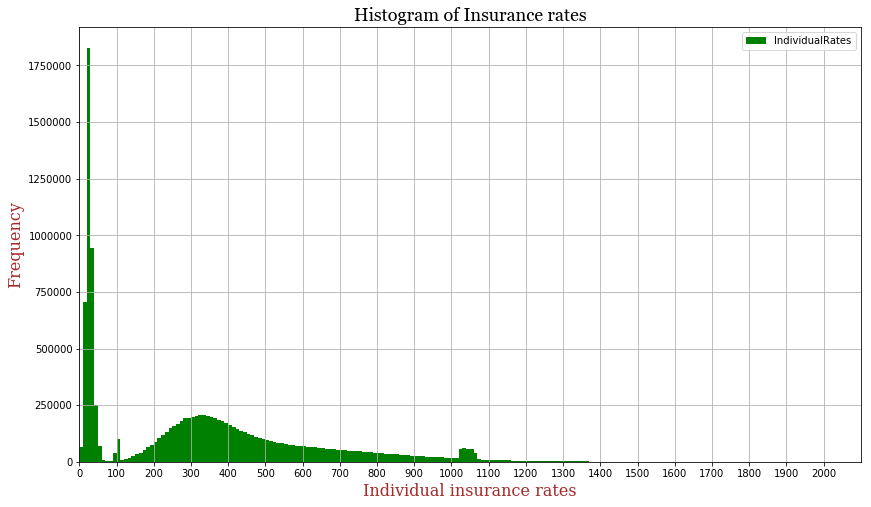

In [638]:
x_number = 0
xticks = []
while(x_number < 2100):
    xticks.append(x_number)
    x_number = x_number + 100
    
fg = pt.figure(figsize=(14,8))
pt.hist(insurance_new.IndividualRate, bins=200, label = 'IndividualRates', color = 'green')
pt.xlabel('Individual insurance rates', fontdict=font)
pt.ylabel('Frequency', fontdict=font)
pt.xlim(xmin=0)
pt.xticks(xticks)
pt.legend()
pt.title("Histogram of Insurance rates", fontdict=titlefont)
pt.grid()

## B3.1 Box plot to get the median for each state

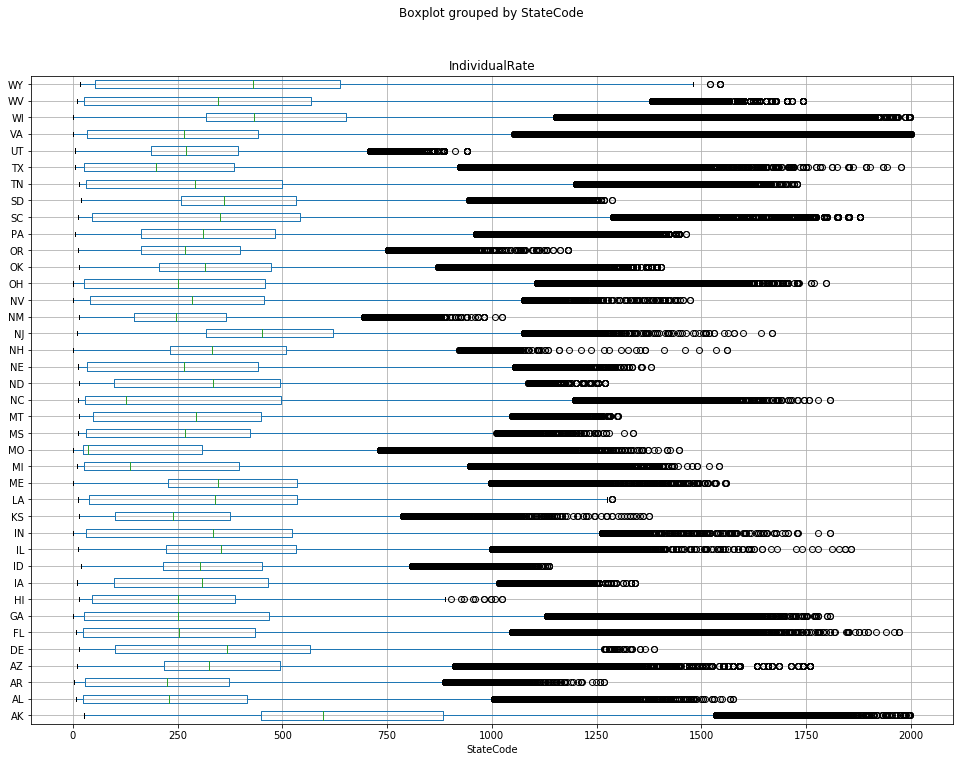

In [639]:
insurance_new.boxplot('IndividualRate', by='StateCode', vert=False, figsize=(16,12))

## B3.2 Bar chart of the number of insurance companies in each state

In [640]:
insurance_new.head(5)

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


In [641]:
state_grouped = insurance_new.groupby(['StateCode'], as_index=False).agg({'IssuerId':{'Unique_count':'nunique'},'IndividualRate':{'Median_col':'median'}})

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [642]:
state_grouped.head(5)

,StateCode,IssuerId,IndividualRate
,,Unique_count,Median_col
0,AK,13,597.93
1,AL,19,229.05
2,AR,16,225.59
3,AZ,38,325.25
4,DE,15,366.86


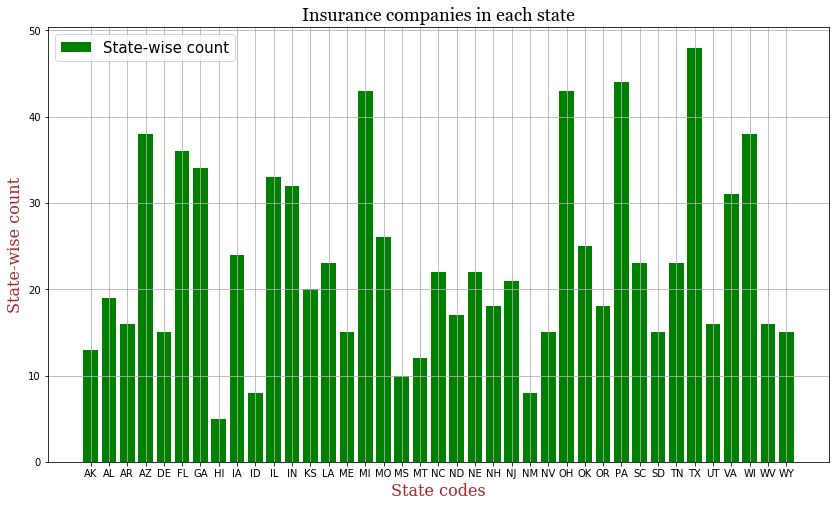

In [643]:
fg = pt.figure(figsize=(14,8))
pt.bar(x=state_grouped.StateCode,height= state_grouped.IssuerId.Unique_count, color = 'green', label='State-wise count')
pt.xlabel('State codes', fontdict=font)
pt.ylabel('State-wise count', fontdict=font)
pt.legend(loc=2, prop={'size': 15})
pt.title("Insurance companies in each state", fontdict=titlefont)
pt.grid()

## B3.3 Scatterplot to plot the number of insurance issuers against the median insurance costfor each state

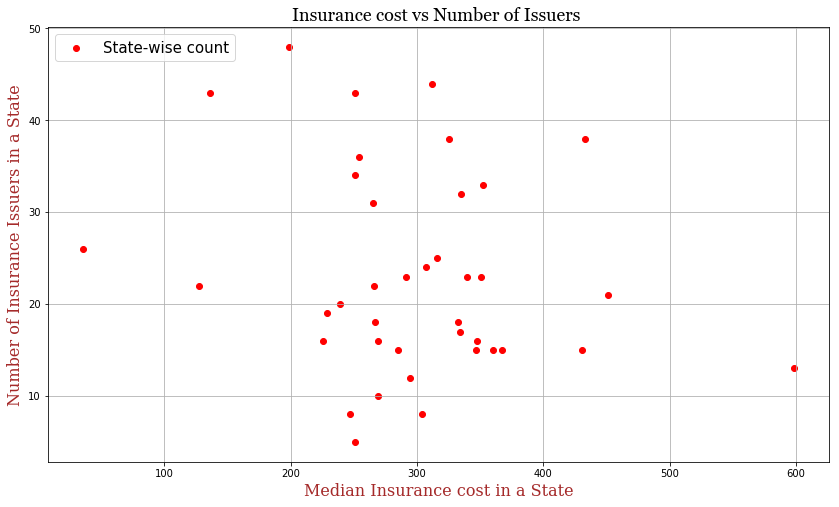

In [644]:
fg = pt.figure(figsize=(14,8))
pt.scatter(y=state_grouped.IssuerId.Unique_count,x= state_grouped.IndividualRate.Median_col, color = 'red', label='State-wise count')
pt.xlabel('Median Insurance cost in a State', fontdict=font)
pt.ylabel('Number of Insurance Issuers in a State', fontdict=font)
pt.legend(loc=2, prop={'size': 15})
pt.title("Insurance cost vs Number of Issuers ", fontdict=titlefont)
pt.grid()

In [645]:
year_wise_insurance = insurance_new.groupby(['BusinessYear'], as_index=False).agg({'IndividualRate':{'Median_col':'median'}})

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [646]:
year_wise_insurance

,BusinessYear,IndividualRate
,,Median_col
0,2014,298.62
1,2015,306.49
2,2016,316.35


## B4. Variation in Costs over Time and with Age

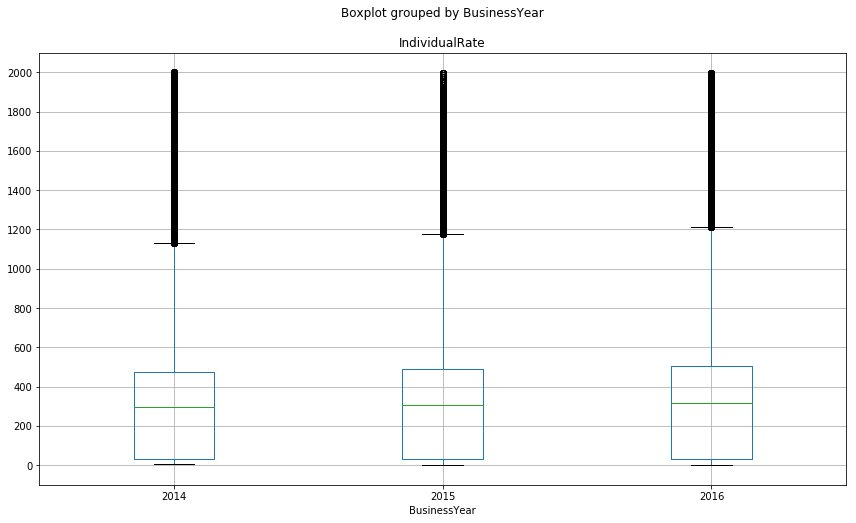

In [647]:
y_number = []
y = 0
while(y < 2100):
    y_number.append(y)
    y = y + 200

box = insurance_new.boxplot(column='IndividualRate', by='BusinessYear', figsize=(14,8))
box.set_yticks(y_number)

In [648]:
insurance_new = insurance_rate[insurance_rate.Age != 'Family Option']
insurance_new.Age.unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over'], dtype=object)

In [649]:
insurance_new.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.0,NaN
3,2014,AK,21989,21989AK0010001,21,32.0,NaN
4,2014,AK,21989,21989AK0010001,22,32.0,NaN
7,2014,AK,21989,21989AK0010001,23,32.0,NaN
8,2014,AK,21989,21989AK0010001,24,32.0,NaN


In [650]:
insurance_second = insurance_new.groupby(['Age'], as_index=False).agg({'IndividualRate':{'Mean_value':'mean','Median_value':'median'}})

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


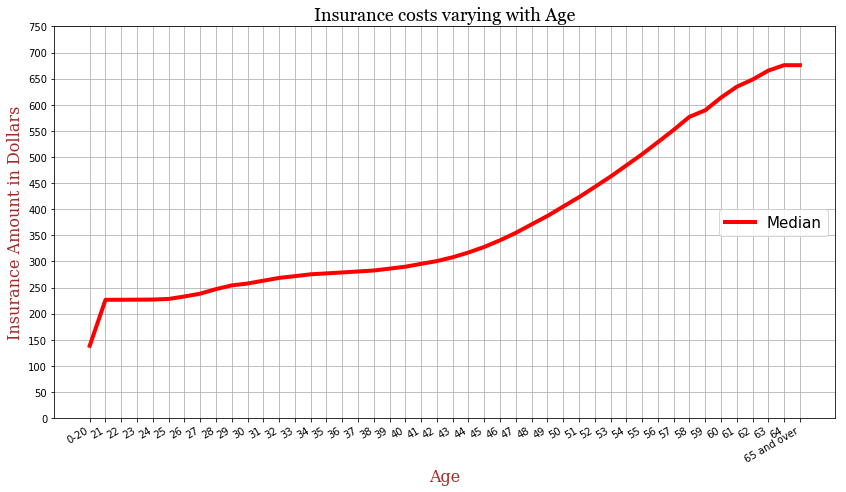

In [651]:
y_number = 0
yticks = []
while(y_number < 800):
    yticks.append(y_number)
    y_number = y_number + 50

fg = pt.figure(figsize=(14,8))
#pt.plot(insurance_second.Age, insurance_second.IndividualRate.Mean_value, label='Mean',color='green',linewidth=4)
pt.plot(insurance_second.Age, insurance_second.IndividualRate.Median_value, label='Median',color='red',linewidth=4)
pt.xlabel('Age', fontdict=font)
pt.ylabel('Insurance Amount in Dollars', fontdict=font)
pt.yticks(yticks)
pt.legend(loc=5, prop={'size': 15})
pt.title("Insurance costs varying with Age", fontdict=titlefont)
fg.autofmt_xdate()
pt.ylim(ymin=0)
pt.grid()

# Task C: Exploratory Analysis on Other Data

Comparison of Literacy, Infant Mortality and GDP of different countries

In [652]:
import pandas as pd
import matplotlib.pyplot as pt

In [653]:
nations = pd.read_csv('nations.csv')
nations.head(5)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,1996,NaN,NaN,64291.0,10.9,2.8,Europe & Central Asia,High income
1,AD,AND,Andorra,1994,NaN,NaN,62707.0,10.9,3.2,Europe & Central Asia,High income
2,AD,AND,Andorra,2003,NaN,NaN,74783.0,10.3,2.0,Europe & Central Asia,High income
3,AD,AND,Andorra,1990,NaN,NaN,54511.0,11.9,4.3,Europe & Central Asia,High income
4,AD,AND,Andorra,2009,NaN,NaN,85474.0,9.9,1.7,Europe & Central Asia,High income


Since the data is not sorted with respect to year, we will first sort the data

In [654]:
nations = nations.sort_values(['country','year'])

In [655]:
nations.birth_rate.unique()

array([49.029, 48.896, 48.834, ..., 36.077, 35.715, 35.189])

In [656]:
nations.head(5)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
69,AF,AFG,Afghanistan,1990,NaN,49.861049,12067570.0,49.029,52.8,South Asia,Low income
55,AF,AFG,Afghanistan,1991,NaN,50.640976,12789374.0,48.896,51.9,South Asia,Low income
62,AF,AFG,Afghanistan,1992,NaN,51.362927,13745630.0,48.834,50.9,South Asia,Low income
53,AF,AFG,Afghanistan,1993,NaN,52.021878,14824371.0,48.839,49.9,South Asia,Low income
54,AF,AFG,Afghanistan,1994,NaN,52.614341,15869967.0,48.898,49.1,South Asia,Low income


## Plotting birthrate change of India, China, Australia from 1990

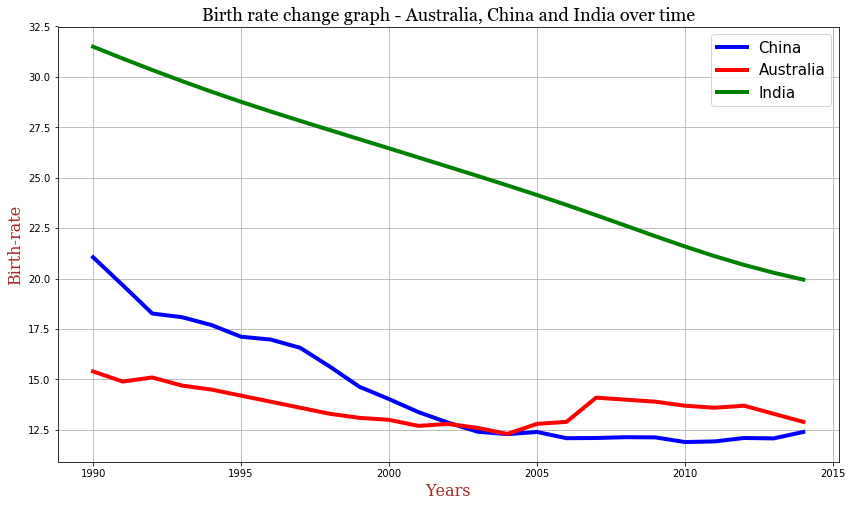

In [657]:
india = nations[nations['country'] == "India"]
china = nations[nations['country'] == "China"]
aus = nations[nations['country'] == "Australia"]
    
fg = pt.figure(figsize=(14,8))
pt.plot(china.year, china.birth_rate, label='China',color='blue',linewidth=4 )
pt.plot(aus.year, aus.birth_rate, label='Australia',color='red',linewidth=4)
pt.plot(india.year, india.birth_rate, label='India',color='green',linewidth=4)
pt.xlabel('Years', fontdict=font)
pt.ylabel('Birth-rate', fontdict=font)
pt.legend(loc=1, prop={'size': 15})
pt.title("Birth rate change graph - Australia, China and India over time", fontdict=titlefont)
#fg.autofmt_xdate()
pt.grid()

## Plotting Life expectancy change of India, China, Australia from 1990

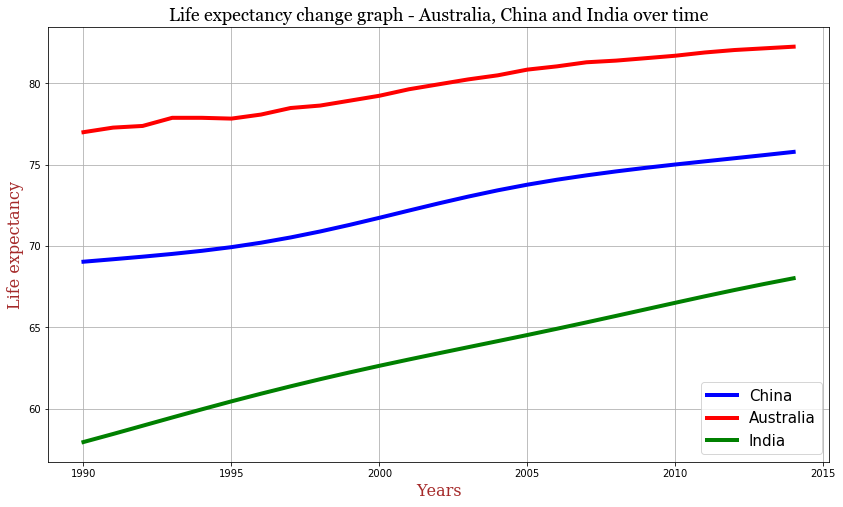

In [658]:
fg = pt.figure(figsize=(14,8))
pt.plot(china.year, china.life_expect, label='China',color='blue',linewidth=4 )
pt.plot(aus.year, aus.life_expect, label='Australia',color='red',linewidth=4)
pt.plot(india.year, india.life_expect, label='India',color='green',linewidth=4)
pt.xlabel('Years', fontdict=font)
pt.ylabel('Life expectancy', fontdict=font)
pt.legend(loc=4, prop={'size': 15})
pt.title("Life expectancy change graph - Australia, China and India over time", fontdict=titlefont)
pt.grid()

In [659]:
nations_latest = nations[nations['year'] == 2014]
region = nations_latest.groupby(['region'], as_index=False).agg({'birth_rate':{'birth_rate':'mean'},'life_expect':{'life_expect':'mean'}})

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [660]:
region.head(10)

,region,birth_rate,life_expect
,,birth_rate,life_expect
0,East Asia & Pacific,19.231033,73.938283
1,Europe & Central Asia,12.381596,77.237927
2,Latin America & Caribbean,17.130889,74.561366
3,Middle East & North Africa,21.388095,74.065929
4,North America,11.300000,80.565130
5,South Asia,22.324375,69.605137
6,Sub-Saharan Africa,35.472638,59.600679


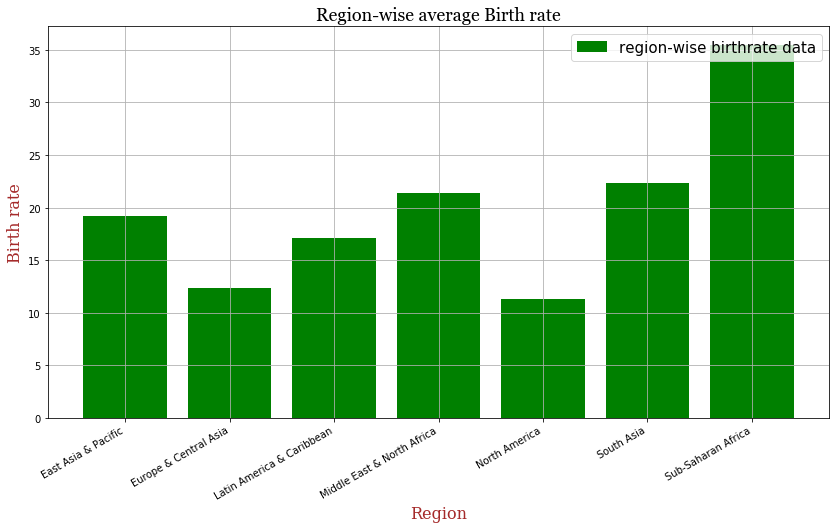

In [661]:
fg = pt.figure(figsize=(14,8))
pt.bar(x=region.region,height= region.birth_rate.birth_rate, color = 'green', label='region-wise birthrate data')
pt.xlabel('Region', fontdict=font)
pt.ylabel('Birth rate', fontdict=font)
pt.legend(loc=1, prop={'size': 15})
pt.title("Region-wise average Birth rate", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

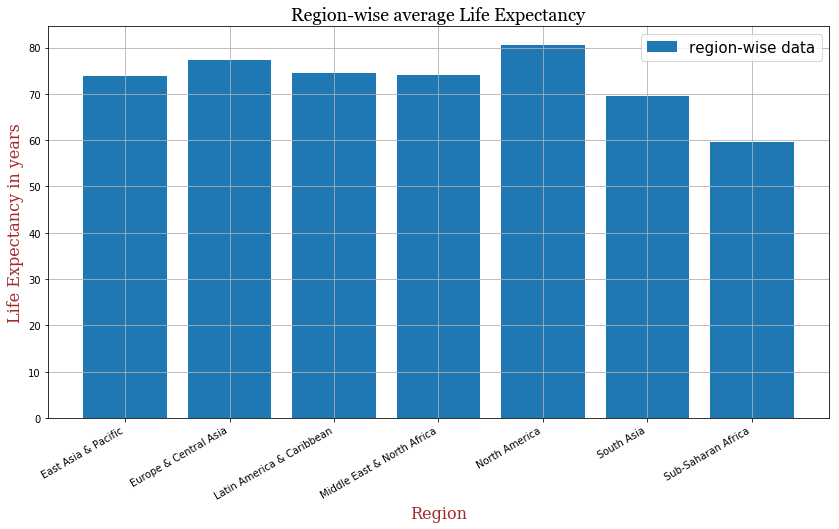

In [662]:
fg = pt.figure(figsize=(14,8))
pt.bar(x=region.region,height= region.life_expect.life_expect, label='region-wise data')
pt.xlabel('Region', fontdict=font)
pt.ylabel('Life Expectancy in years', fontdict=font)
pt.legend(loc=1, prop={'size': 15})
pt.title("Region-wise average Life Expectancy", fontdict=titlefont)
fg.autofmt_xdate()
pt.grid()

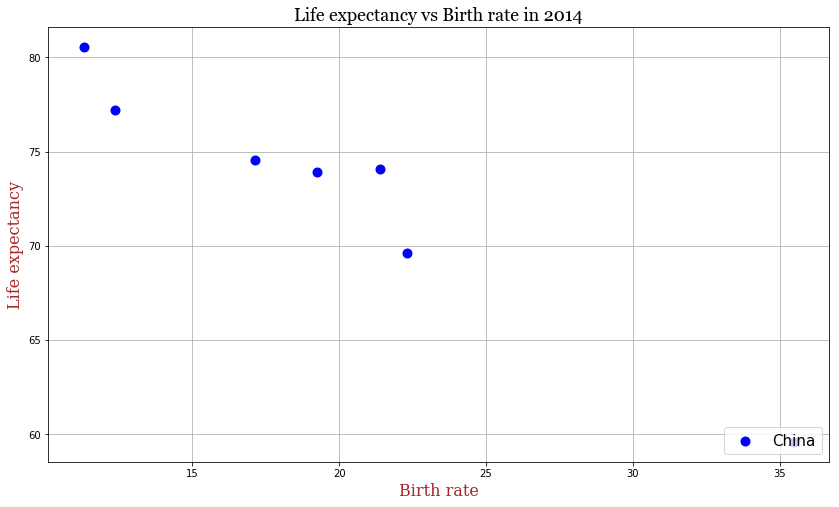

In [663]:
fg = pt.figure(figsize=(14,8))
pt.scatter(region.birth_rate.birth_rate, region.life_expect.life_expect, label='China',color='blue',linewidth=4 )
pt.xlabel('Birth rate', fontdict=font)
pt.ylabel('Life expectancy', fontdict=font)
pt.legend(loc=4, prop={'size': 15})
pt.title("Life expectancy vs Birth rate in 2014", fontdict=titlefont)
pt.grid()

## Box-plot of the latest(2014) GDP per capita for different regions to identify mean, median

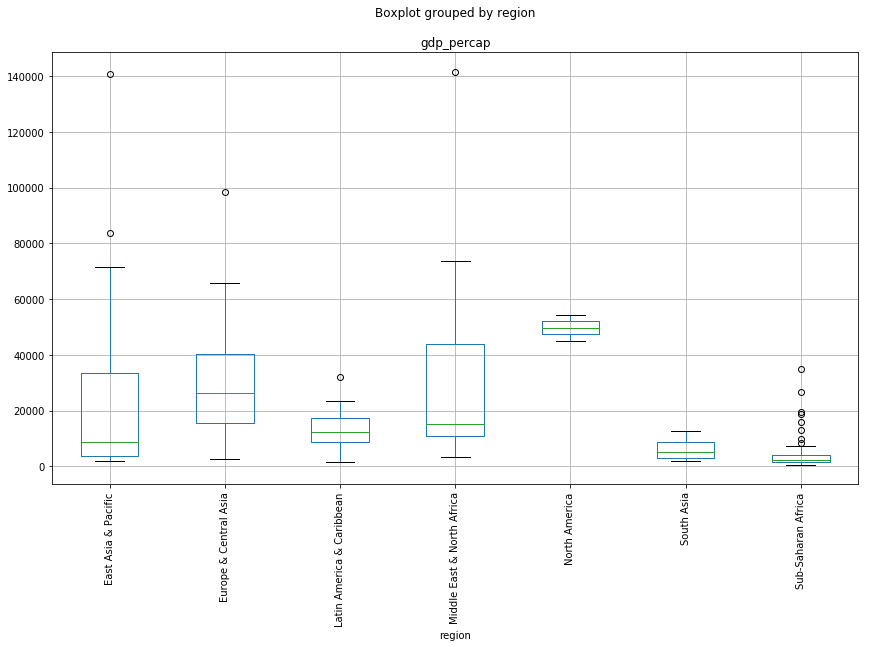

In [664]:
box = nations_latest.boxplot(column='gdp_percap', by='region', figsize=(14,8))
box.tick_params(axis='x', rotation=90)

## Motion chart to understand birth_rate and life_expectancy in Indian and Australia over time

In [665]:
from motionchart.motionchart import MotionChart

In [666]:
nations.head(1)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
69,AF,AFG,Afghanistan,1990,NaN,49.861049,12067570.0,49.029,52.8,South Asia,Low income


In [667]:
india = nations[nations.country =='India']
aus = nations[nations.country =='Australia']

# now generate the motionchart and show it in the notebook
motionChart = MotionChart(df = india.append(aus), key='year', x='life_expect', y='birth_rate', xscale='linear', yscale='linear',
                     size='population', color='country', category='country')
motionChart.to_notebook()

## Predicting the GDP for India by 2020. Plotting the scatter plot and linear regression line

In [668]:
India = nations[nations.country == 'India']
India.dropna()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
2162,IN,IND,India,1990,1146.027972,57.943732,8.706018e+08,31.498,57.4,South Asia,Lower middle income
2150,IN,IND,India,1991,1172.563612,58.438220,8.885139e+08,30.912,56.1,South Asia,Lower middle income
2154,IN,IND,India,1992,1239.995548,58.945073,9.064614e+08,30.343,54.8,South Asia,Lower middle income
2170,IN,IND,India,1993,1303.896725,59.452927,9.244756e+08,29.794,53.7,South Asia,Lower middle income
2173,IN,IND,India,1994,1393.002443,59.954829,9.426042e+08,29.267,52.5,South Asia,Lower middle income
2167,IN,IND,India,1995,1500.681341,60.444366,9.608750e+08,28.766,51.4,South Asia,Lower middle income
2168,IN,IND,India,1996,1612.534898,60.915610,9.792904e+08,28.286,50.3,South Asia,Lower middle income
2159,IN,IND,India,1997,1674.869744,61.369561,9.978172e+08,27.822,49.0,South Asia,Lower middle income
2155,IN,IND,India,1998,1764.878225,61.807220,1.016403e+09,27.365,47.8,South Asia,Lower middle income
2151,IN,IND,India,1999,1915.390649,62.227073,1.034977e+09,26.911,46.5,South Asia,Lower middle income


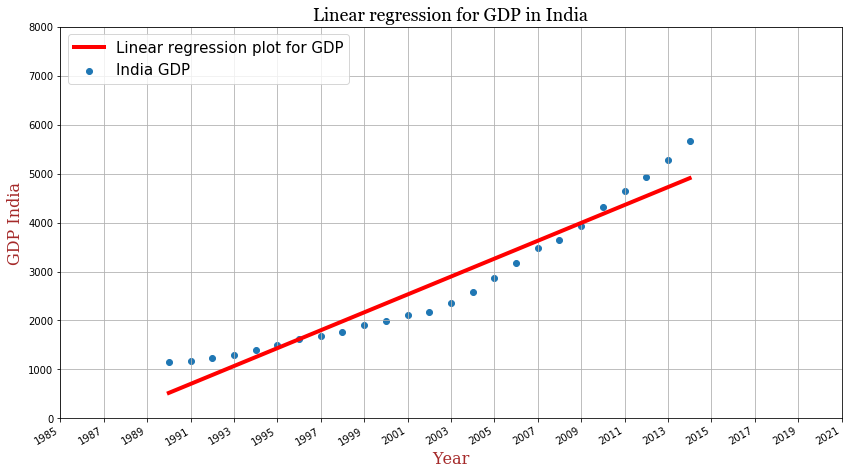

In [669]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(india.year,india.gdp_percap)
line = [slope*xi + intercept for xi in india.year]

number = 1985
xticks = []
while(number < 2022):
    xticks.append(number)
    number = number + 2
    
ynumber = 0
yticks = []
while(ynumber < 9000):
    yticks.append(ynumber)
    ynumber = ynumber + 1000
    
fg = pt.figure(figsize=(14,8))
pt.plot(india.year,line,'r-', linewidth=4, label = 'Linear regression plot for GDP')
pt.scatter(india.year, india.gdp_percap, label = 'India GDP')
pt.legend(loc=2, prop={'size': 15})
pt.xlabel('Year', fontdict=font)
pt.ylabel('GDP India', fontdict=font)
pt.title("Linear regression for GDP in India", fontdict=titlefont)
pt.xticks(xticks)
pt.yticks(yticks)
pt.ylim(ymin=0)
pt.grid()
fg.autofmt_xdate()

## Plotting the linear regression for latest data from 2005

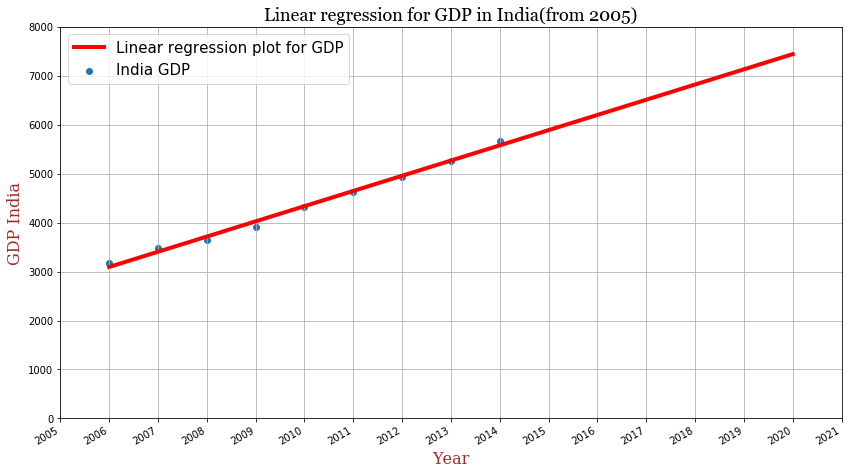

In [670]:
india = india[india.year > 2005]
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(india.year,india.gdp_percap)
year = india.year.tolist()
year.append(2020)
line = [slope*xi + intercept for xi in pd.Series(year)]

number = 2005
xticks = []
while(number < 2022):
    xticks.append(number)
    number = number + 1
    
ynumber = 0
yticks = []
while(ynumber < 9000):
    yticks.append(ynumber)
    ynumber = ynumber + 1000
    
fg = pt.figure(figsize=(14,8))
pt.plot(pd.Series(year),line,'r-', linewidth=4, label = 'Linear regression plot for GDP')
pt.scatter(india.year, india.gdp_percap, label = 'India GDP')
pt.legend(loc=2, prop={'size': 15})
pt.xlabel('Year', fontdict=font)
pt.ylabel('GDP India', fontdict=font)
pt.title("Linear regression for GDP in India(from 2005)", fontdict=titlefont)
pt.xticks(xticks)
pt.yticks(yticks)
pt.ylim(ymin=0)
pt.grid()
fg.autofmt_xdate()

Looking at the linear regression(after extending the line) ,we can predict that the GDP of India will become approx 7500 by 2020